In [1]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('deep-learning/data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:, 12]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# validation_split=0.25 ==> 한 에포크당 25%를 떼어내고 검증한뒤에 에포크 종료시에 돌려줌
# log 출력 제한 verbose = 0
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0) 

In [8]:
# history의 history객체를 dataframe으로 만들기
hist_df = pd.DataFrame(history.history)
# 좌측의 인덱스가 epoch넘버
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.970020,0.243521,1.911068,0.242308
1,1.478042,0.238389,0.840043,0.202308
2,0.778063,0.419297,0.685255,0.710769
3,0.638503,0.820375,0.612054,0.853077
4,0.583675,0.867590,0.561083,0.862308


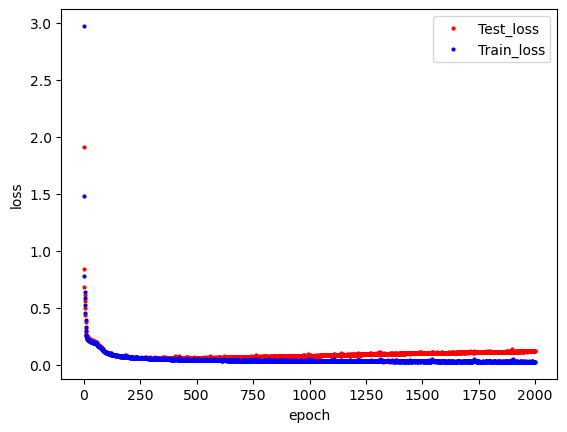

In [9]:
import numpy as np
# y_vloss 는 validation 했을때 손실값
y_vloss=hist_df['val_loss']
# y_loss 는 학습했을때 손실 값
y_loss=hist_df['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Test_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 결과를 통해 과적합이 되었음을 알 수 있음